In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import warnings
import os.path
import os,re
import glob
import pprint
import pathlib
import threading
import time
import joblib
from pandas import DataFrame
from datetime import datetime,timedelta
import datetime
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint
import joblib
from tensorflow import keras
from sklearn.utils import shuffle

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/Hancom Gothic Regular.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
plt.rcParams['axes.unicode_minus'] = False
get_ipython().run_line_magic('config', "InlineBackend.figure_format='retina'")

### F.P.MCPL Data for DNN 

In [5]:
new_data = pd.read_csv(r'H:\연구실\2022진동_졸업논문정리\new_data.csv',index_col=0)

In [7]:
# X,Y
x = new_data.iloc[:,0:6000]
y = new_data.iloc[:,6002:].values

In [8]:
# Train Test Split
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(x, y, test_size=0.3, random_state=1, stratify = y)

### DNN_Model1

In [10]:
# data : 500 data per each state and capacity 

# model1 = 128,64
# model2 = 128,64,32
# model3 = 32,16,8
model= tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation='relu', input_shape=[6000]))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(37, activation='softmax'))

optimizer = tf.keras.optimizers.Adam()
model.compile(optimizer=optimizer,
              loss='categorical_crossentropy', 
              metrics=['accuracy']) 

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768128    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 37)                2405      
                                                                 
Total params: 778,789
Trainable params: 778,789
Non-trainable params: 0
_________________________________________________________________


In [12]:
checkpoint_path = "dnn_model1.ckpt"

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 save_best_only=True, 
                                                 monitor='val_loss', 
                                                 verbose=1)

hist = model.fit(train_x, 
          train_y,  
          epochs=32,batch_size = 16,
          validation_data=(val_x,val_y),
          callbacks=[cp_callback])

Epoch 1/32
810/810 [==============================] - ETA: 0s - loss: 2.8042 - accuracy: 0.2131
Epoch 1: val_loss improved from inf to 2.13505, saving model to dnn_model1.ckpt
810/810 [==============================] - 5s 6ms/step - loss: 2.8042 - accuracy: 0.2131 - val_loss: 2.1350 - val_accuracy: 0.3706
Epoch 2/32
802/810 [============================>.] - ETA: 0s - loss: 1.7112 - accuracy: 0.5140
Epoch 2: val_loss improved from 2.13505 to 1.30031, saving model to dnn_model1.ckpt
810/810 [==============================] - 4s 5ms/step - loss: 1.7074 - accuracy: 0.5151 - val_loss: 1.3003 - val_accuracy: 0.5668
Epoch 3/32
807/810 [============================>.] - ETA: 0s - loss: 0.9757 - accuracy: 0.7788
Epoch 3: val_loss improved from 1.30031 to 0.70096, saving model to dnn_model1.ckpt
810/810 [==============================] - 4s 5ms/step - loss: 0.9749 - accuracy: 0.7792 - val_loss: 0.7010 - val_accuracy: 0.8268
Epoch 4/32
803/810 [============================>.] - ETA: 0s - loss: 0

809/810 [============================>.] - ETA: 0s - loss: 2.3881e-04 - accuracy: 1.0000
Epoch 27: val_loss did not improve from 0.00031
810/810 [==============================] - 4s 5ms/step - loss: 2.3910e-04 - accuracy: 1.0000 - val_loss: 0.0014 - val_accuracy: 0.9996
Epoch 28/32
801/810 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9997
Epoch 28: val_loss improved from 0.00031 to 0.00029, saving model to dnn_model1.ckpt
810/810 [==============================] - 4s 5ms/step - loss: 0.0023 - accuracy: 0.9997 - val_loss: 2.8629e-04 - val_accuracy: 1.0000
Epoch 29/32
807/810 [============================>.] - ETA: 0s - loss: 1.2311e-04 - accuracy: 1.0000
Epoch 29: val_loss improved from 0.00029 to 0.00017, saving model to dnn_model1.ckpt
810/810 [==============================] - 4s 5ms/step - loss: 1.2283e-04 - accuracy: 1.0000 - val_loss: 1.7206e-04 - val_accuracy: 1.0000
Epoch 30/32
806/810 [============================>.] - ETA: 0s - loss: 1.4108e-04 - ac

In [13]:
model.save('dnn_model1.h')

INFO:tensorflow:Assets written to: dnn_model1.h\assets


INFO:tensorflow:Assets written to: dnn_model1.h\assets


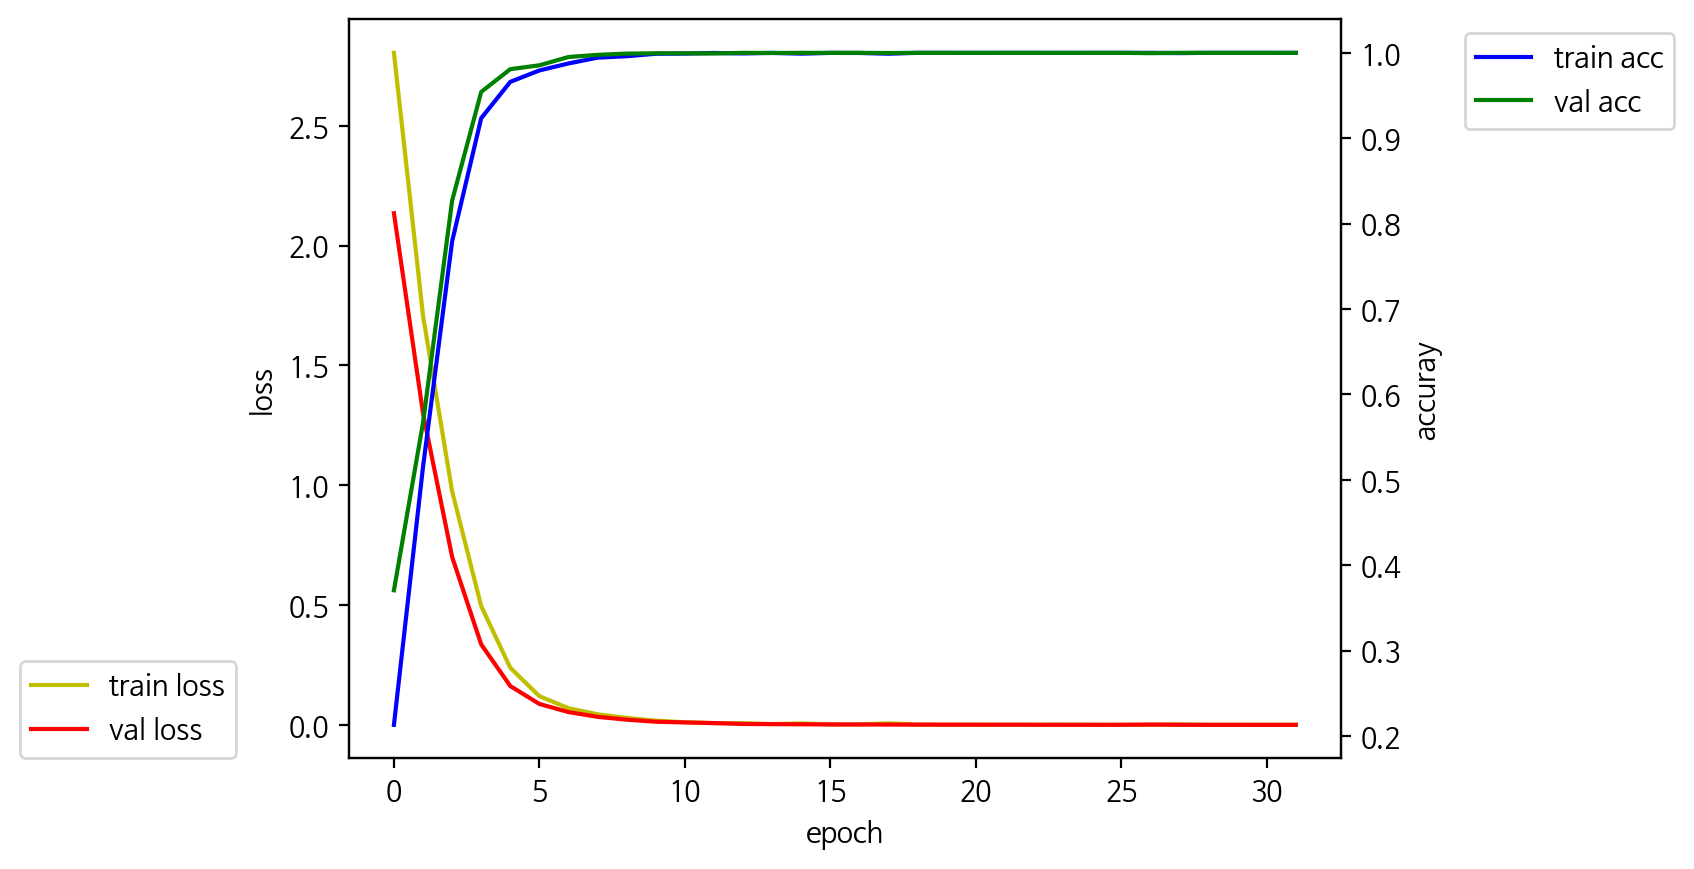

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(bbox_to_anchor=(-0.1,0.15))
acc_ax.legend(bbox_to_anchor=(1.35,1))

plt.savefig(r'Z:\Subi\BDJ_DNN\DNN_Model1.png')
plt.show()

In [15]:
val_pred = model.predict(val_x)
accuracy = model.evaluate(val_x,val_y)

174/174 [==============================] - 0s 882us/step - loss: 1.4243e-04 - accuracy: 1.0000


In [17]:
model.evaluate(train_x,train_y)

405/405 [==============================] - 0s 838us/step - loss: 6.2896e-05 - accuracy: 1.0000


[6.289553857641295e-05, 1.0]